<a href="https://colab.research.google.com/github/NINJAHATTORI004/csi/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 5
 Simple Linear Regression, Multiple Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, ElasticNet Regression on this data

Here is all the data you need:
"House_Prices.csv"

## Data loading

### Subtask:
Load the "House_Prices.csv" dataset.


**Reasoning**:
Load the dataset and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('House_Prices.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'House_Prices.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'House_Prices.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'House_Prices.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


(21613, 21)


## Data exploration

### Subtask:
Explore the dataset to understand its features, identify missing values, and check the distribution of variables.


**Reasoning**:
I need to explore the dataset, including data types, missing values, distributions, and relationships between features.



In [2]:
# Data types and missing values
print(df.info())
print(df.isnull().sum() / len(df) * 100)

# Distribution of numerical features
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    print(f"Descriptive statistics for {col}:")
    print(numerical_features[col].describe())
    plt.figure(figsize=(8, 6))
    plt.hist(numerical_features[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.boxplot(numerical_features[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# Relationship between numerical features and the target variable ('Price')
for col in numerical_features.columns:
    if col != 'Price':
        plt.figure(figsize=(8, 6))
        plt.scatter(numerical_features[col], numerical_features['Price'])
        plt.title(f"Scatter plot of {col} vs. Price")
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.show()
        correlation = numerical_features[col].corr(numerical_features['Price'])
        print(f"Correlation between {col} and Price: {correlation}")

# Analysis of categorical features
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(f"Frequency of categories for {col}:")
    print(categorical_features[col].value_counts())
    plt.figure(figsize=(8, 6))
    categorical_features[col].value_counts().plot(kind='bar')
    plt.title(f"Bar chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Summarize the findings (This would be a textual description)
# Placeholder for textual summary.  This would be generated in a real application.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

NameError: name 'plt' is not defined

**Reasoning**:
The previous code block failed due to `plt` not being defined. I need to import `matplotlib.pyplot` to fix this error.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

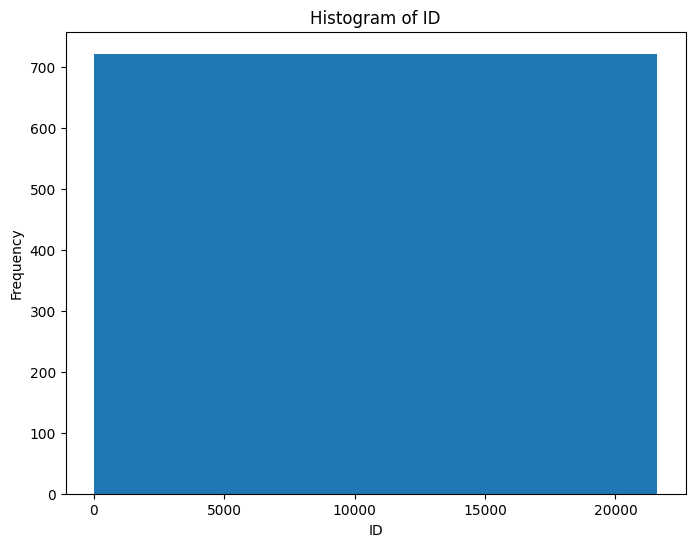

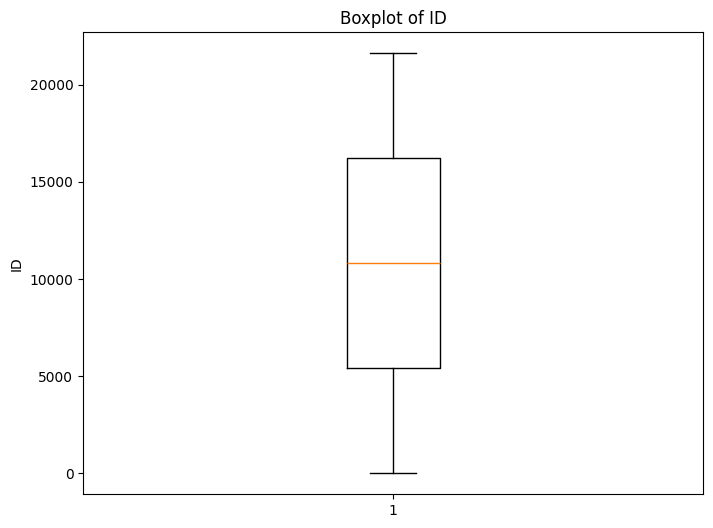

Descriptive statistics for Price:
count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64


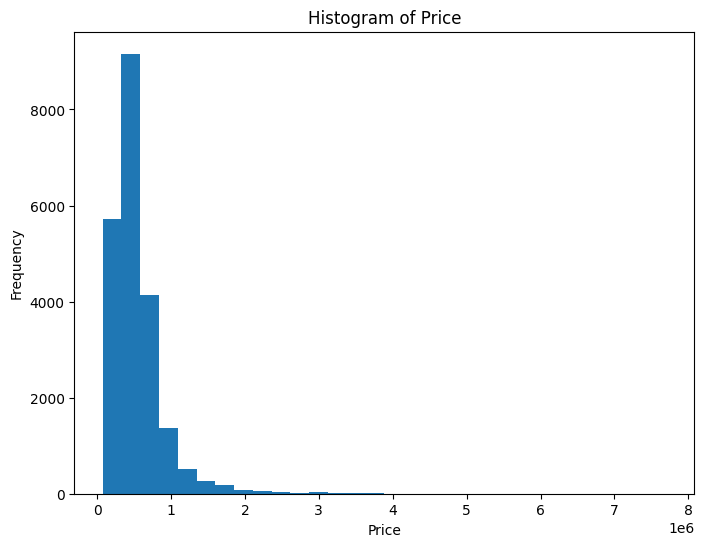

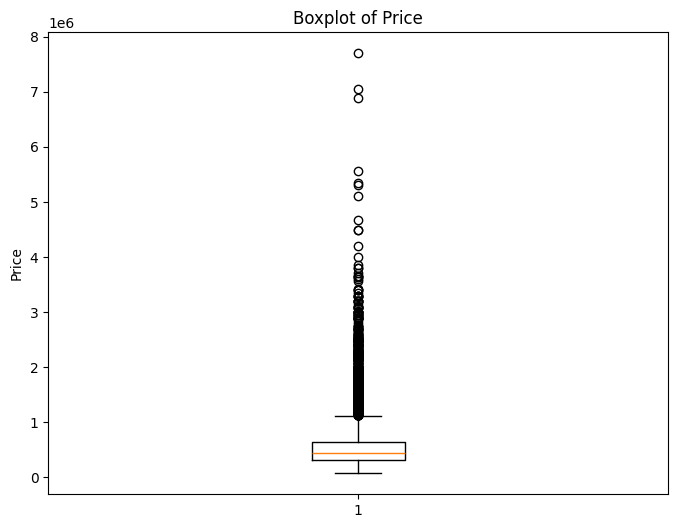

Descriptive statistics for Bedrooms:
count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: Bedrooms, dtype: float64


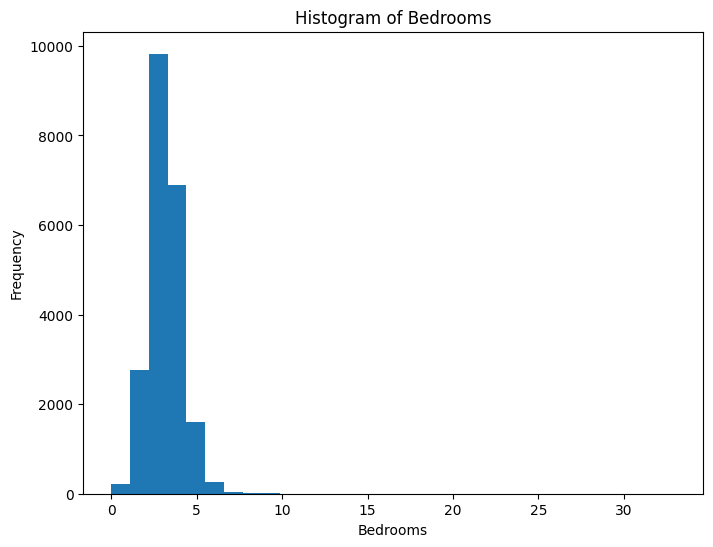

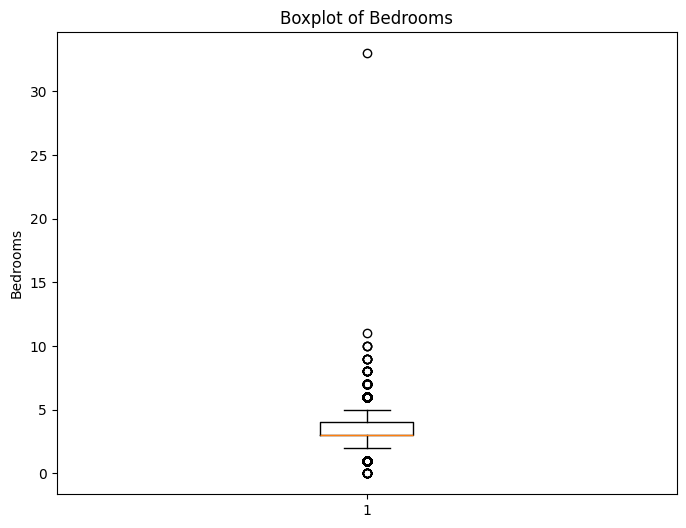

Descriptive statistics for Bathrooms:
count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: Bathrooms, dtype: float64


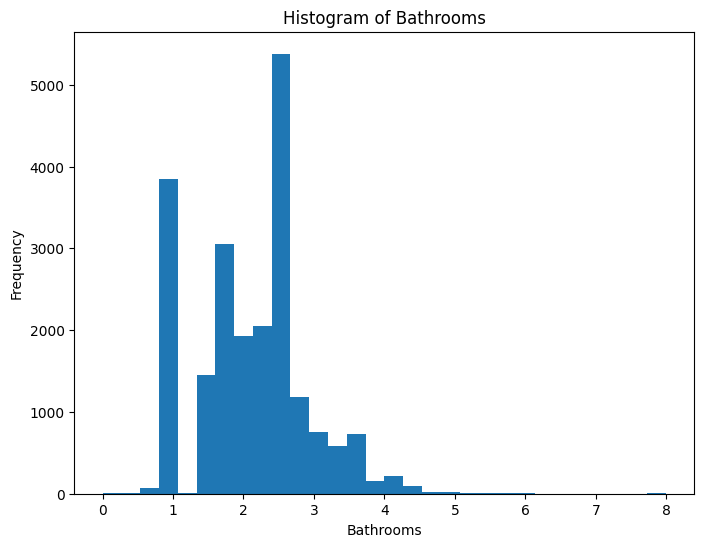

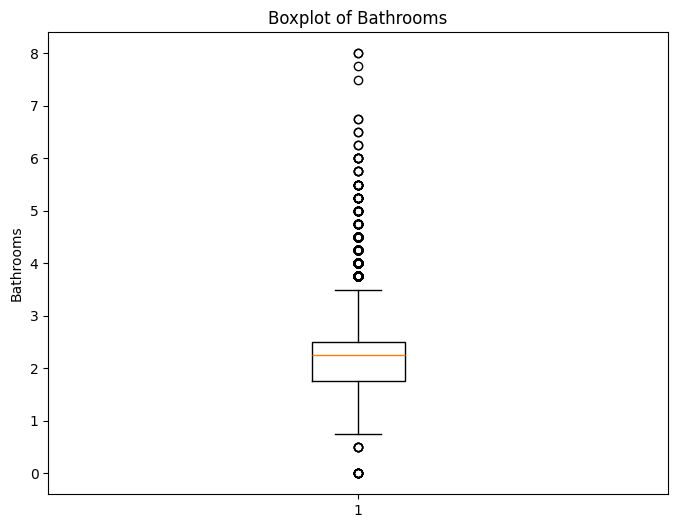

Descriptive statistics for Sqft_living:
count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: Sqft_living, dtype: float64


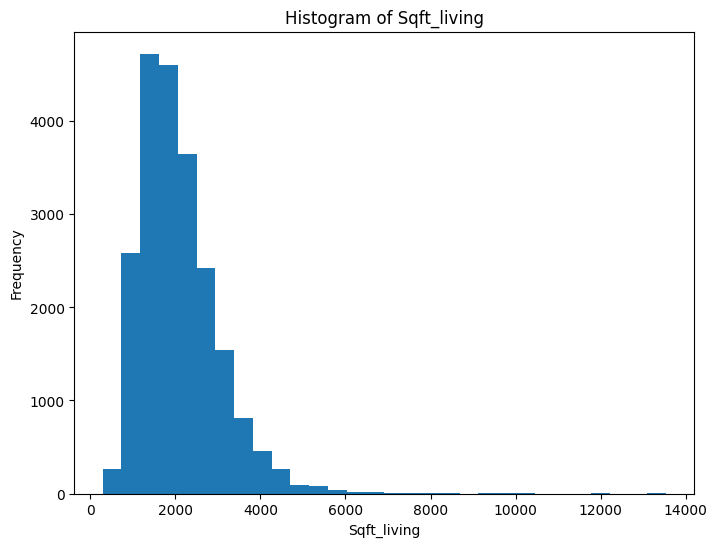

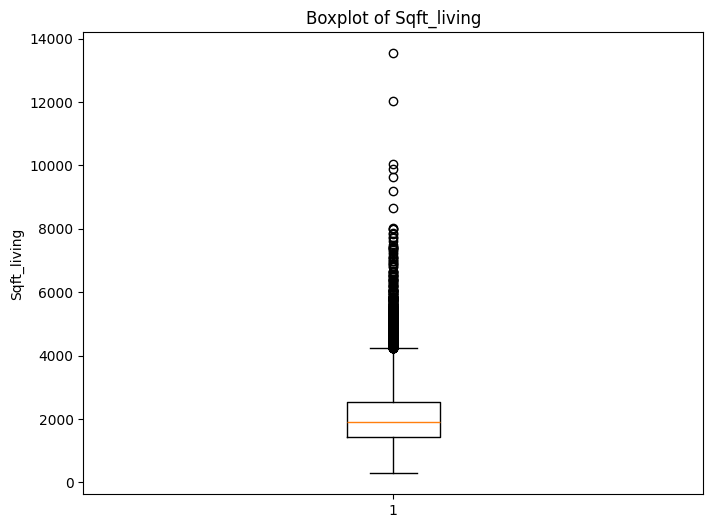

Descriptive statistics for Sqft_lot:
count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: Sqft_lot, dtype: float64


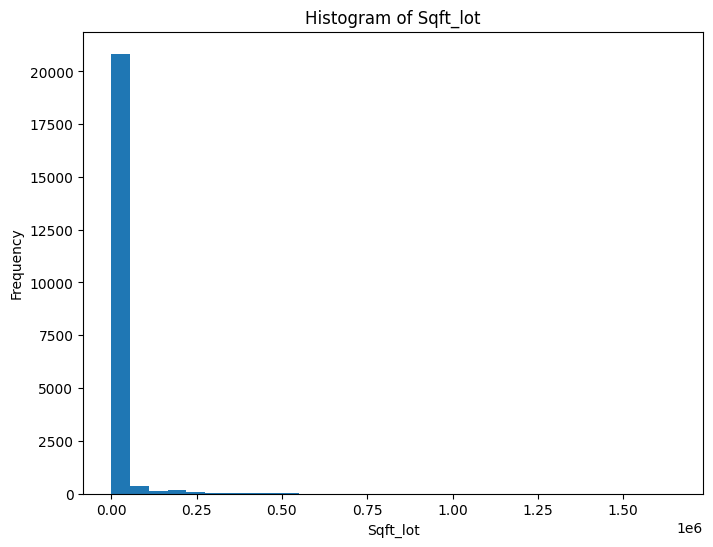

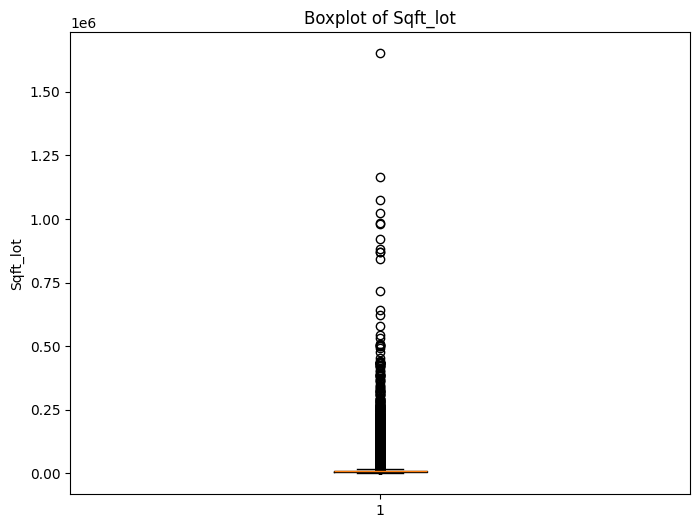

Descriptive statistics for Floors:
count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: Floors, dtype: float64


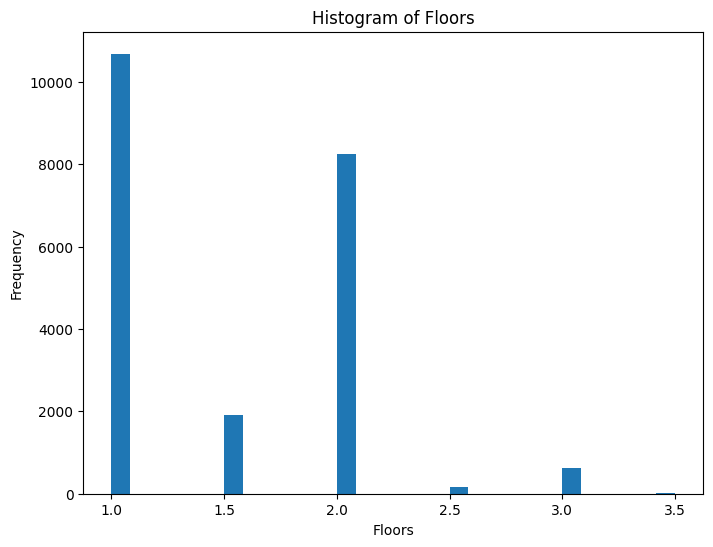

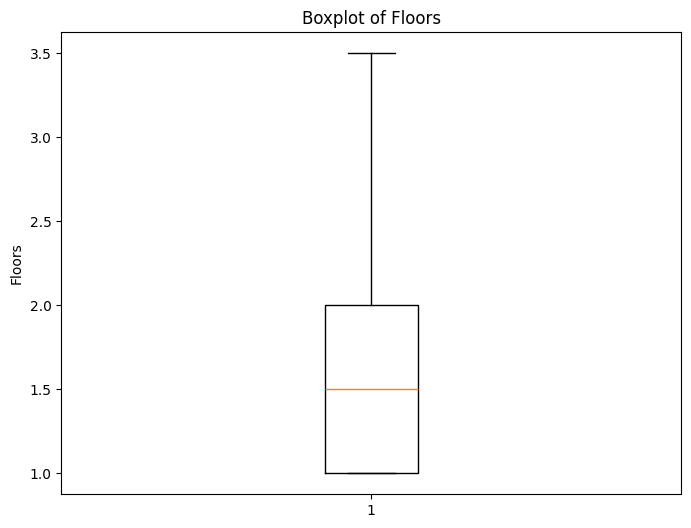

Descriptive statistics for Waterfront:
count    21613.000000
mean         0.007542
std          0.086517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Waterfront, dtype: float64


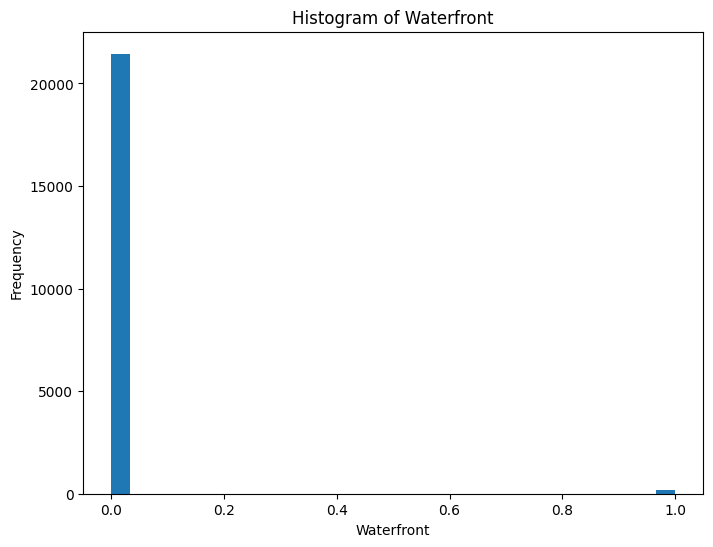

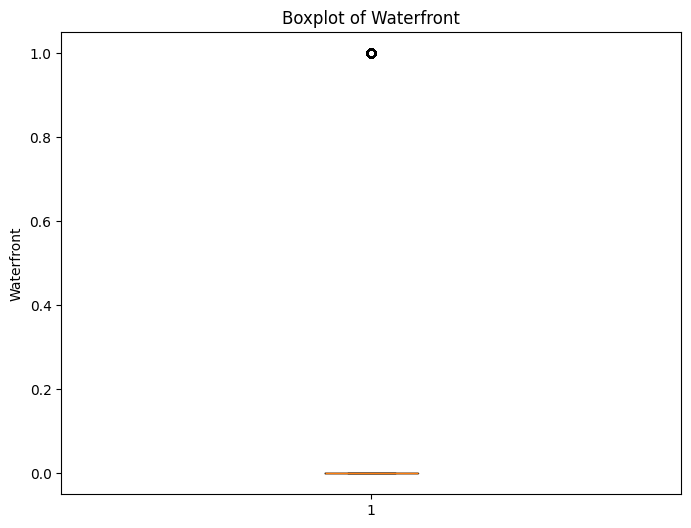

Descriptive statistics for View:
count    21613.000000
mean         0.234303
std          0.766318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: View, dtype: float64


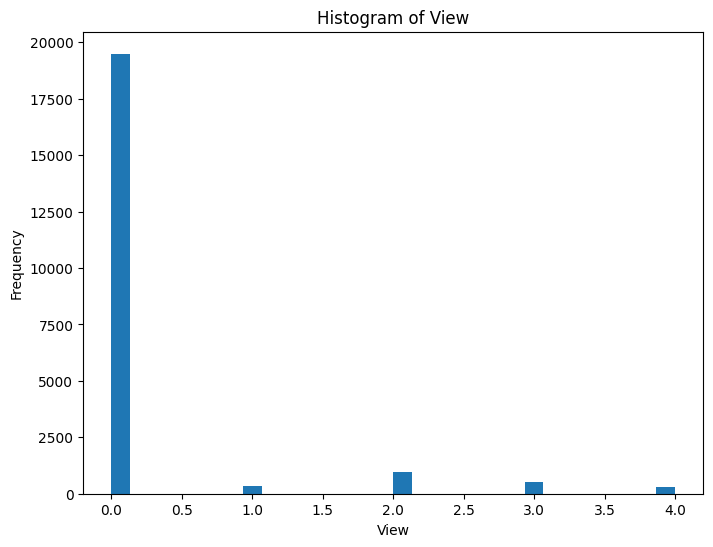

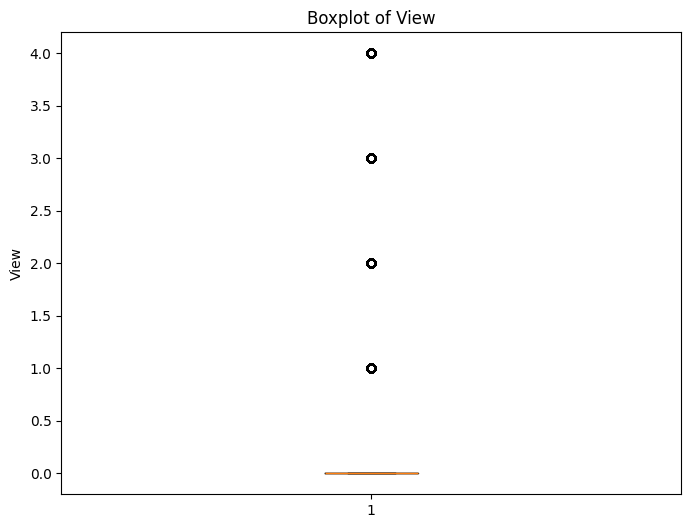

Descriptive statistics for Condition:
count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Condition, dtype: float64


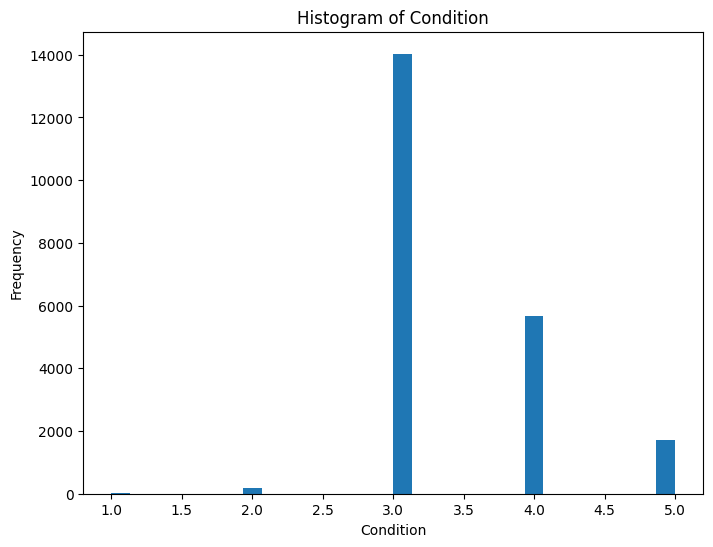

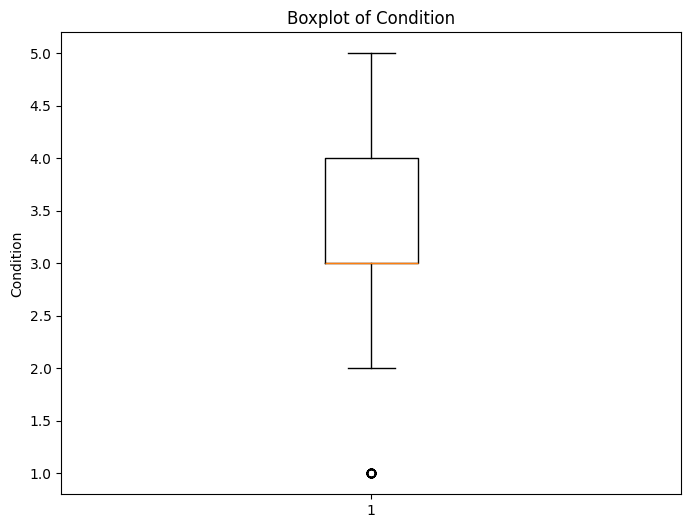

Descriptive statistics for Grade:
count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: Grade, dtype: float64


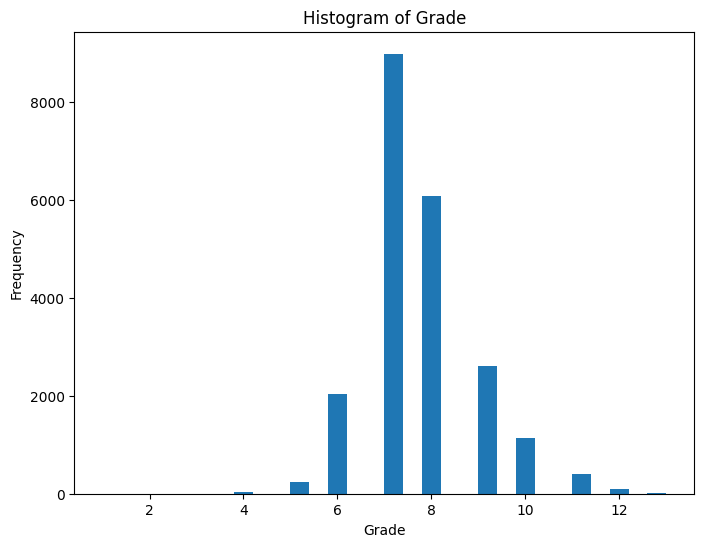

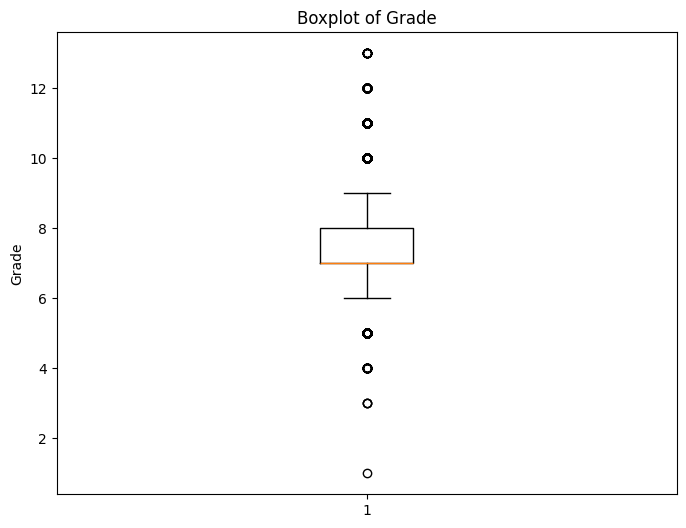

Descriptive statistics for Sqft_above:
count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: Sqft_above, dtype: float64


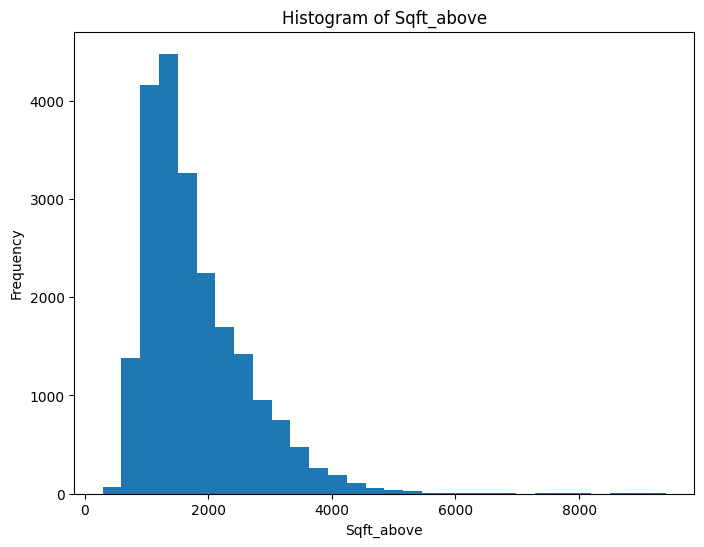

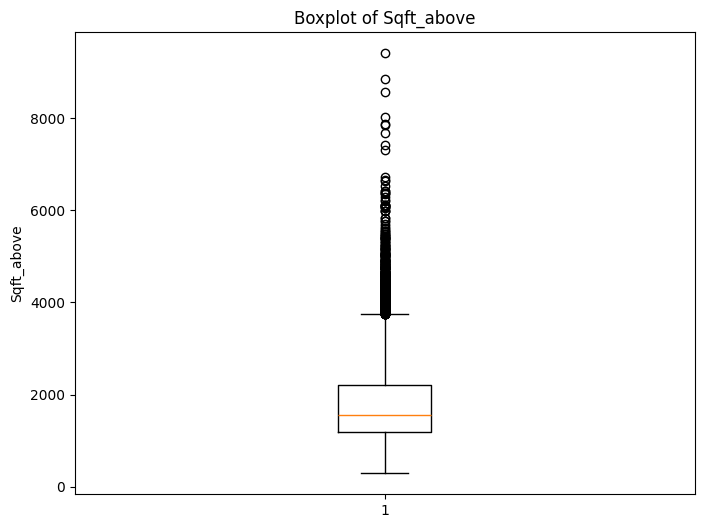

Descriptive statistics for Sqft_basement:
count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: Sqft_basement, dtype: float64


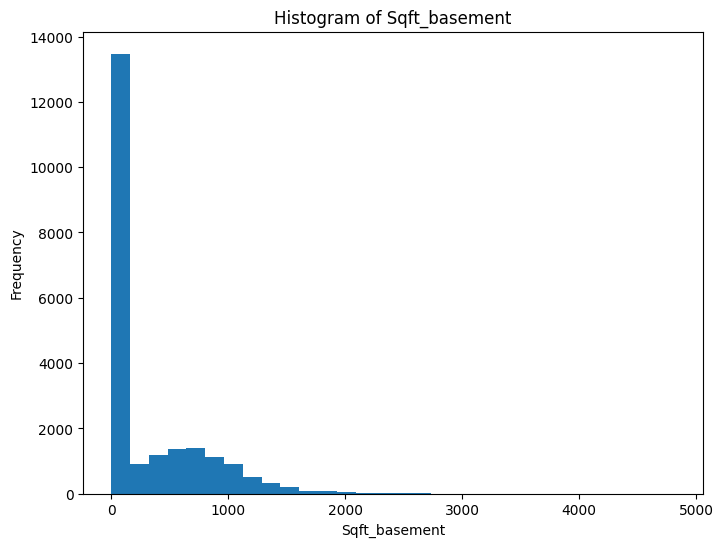

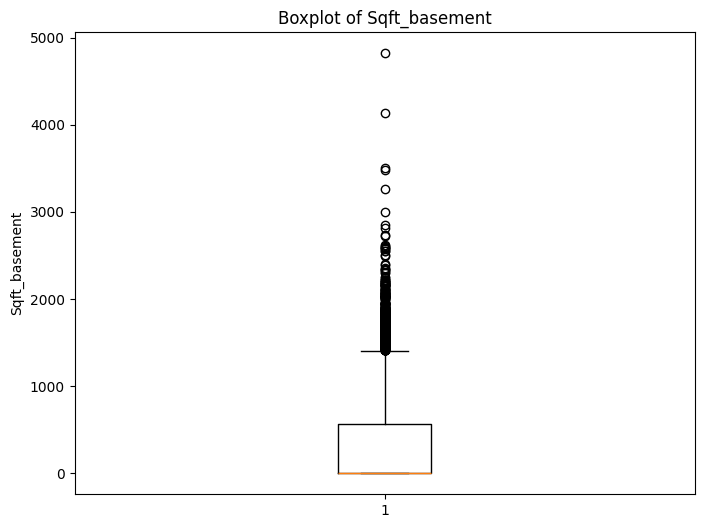

Descriptive statistics for Yr_built:
count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: Yr_built, dtype: float64


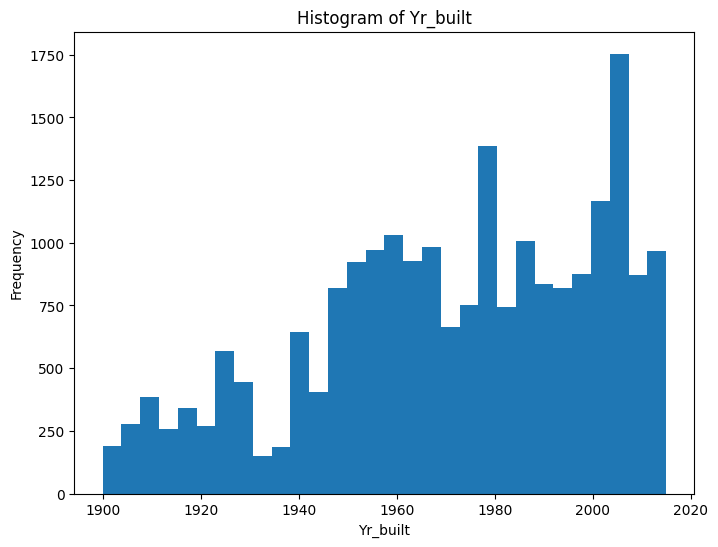

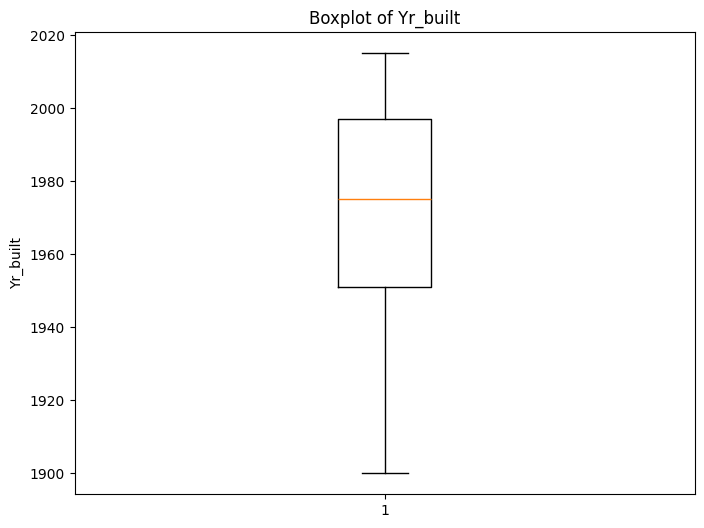

Descriptive statistics for Yr_renovated:
count    21613.000000
mean        84.402258
std        401.679240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: Yr_renovated, dtype: float64


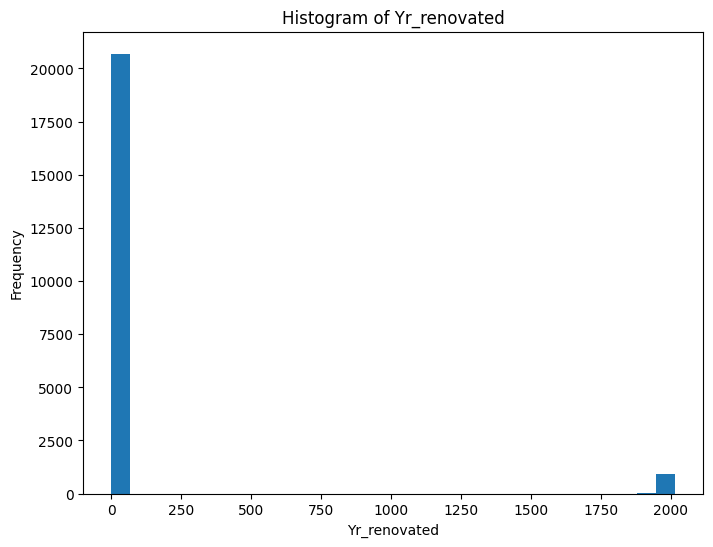

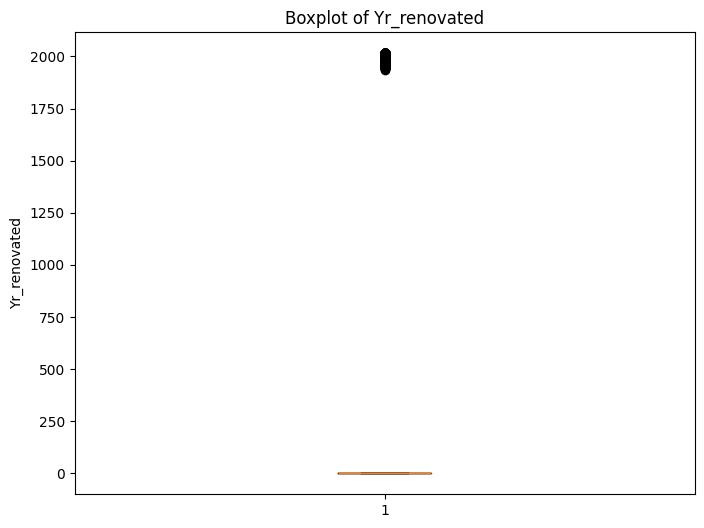

Descriptive statistics for zipcode:
count    21613.000000
mean     98077.939805
std         53.505026
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64


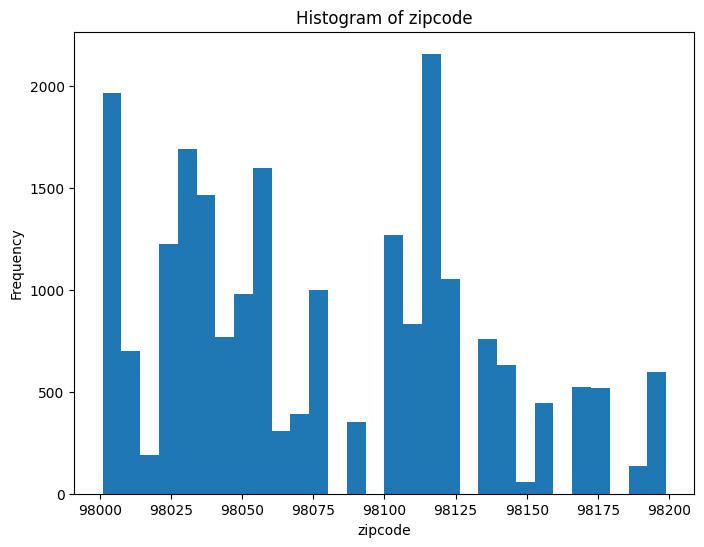

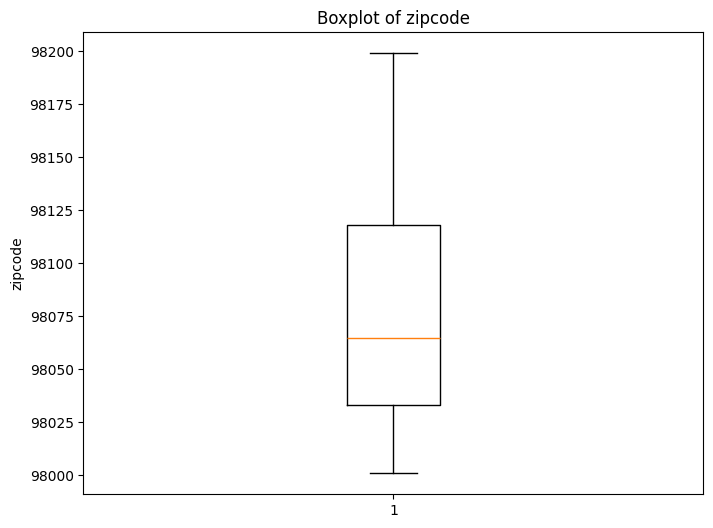

Descriptive statistics for Lat:
count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: Lat, dtype: float64


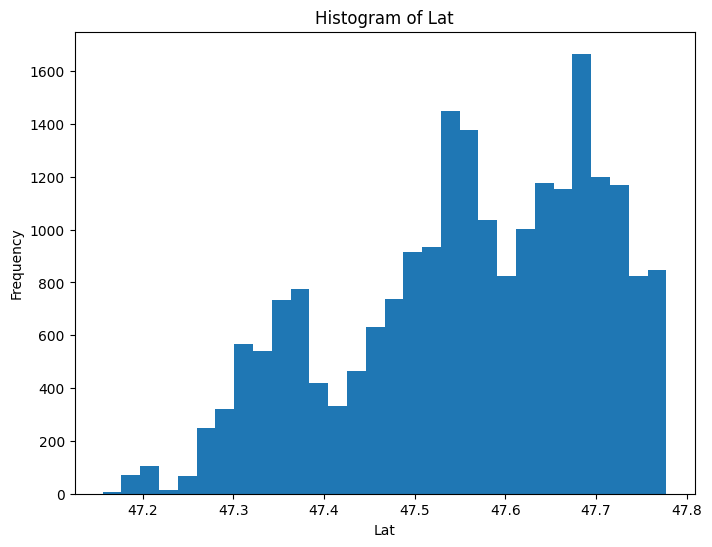

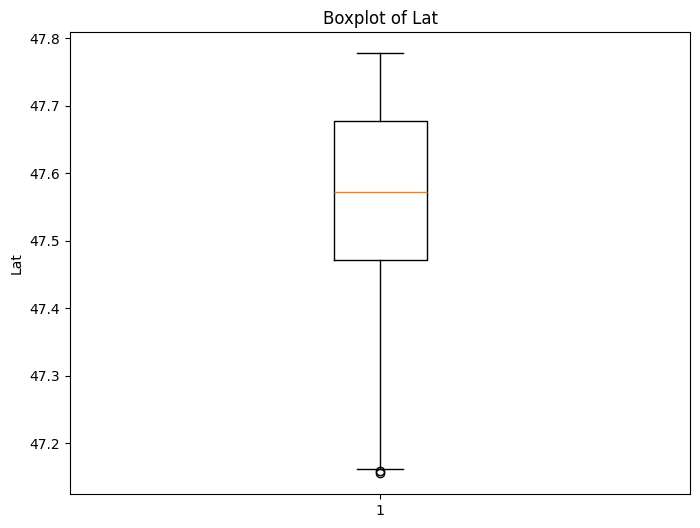

Descriptive statistics for Long:
count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: Long, dtype: float64


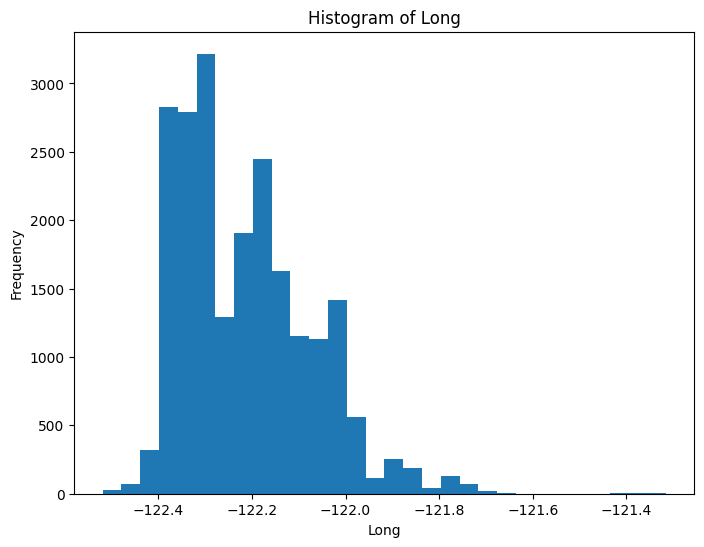

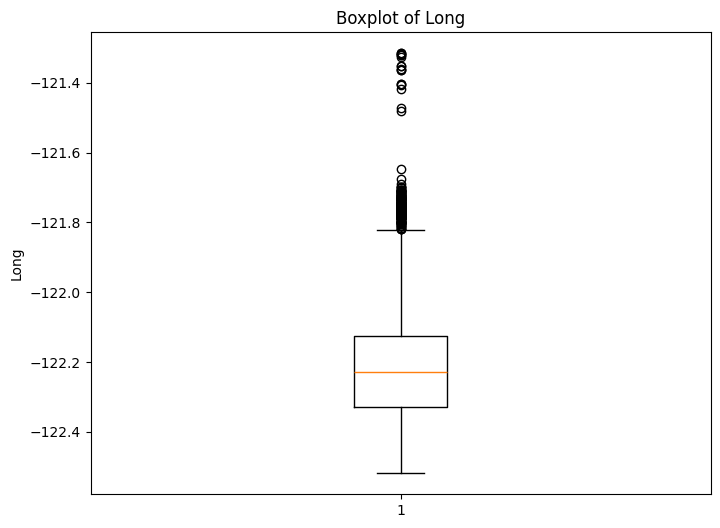

Descriptive statistics for Sqft_living15:
count    21613.000000
mean      1986.552492
std        685.391304
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: Sqft_living15, dtype: float64


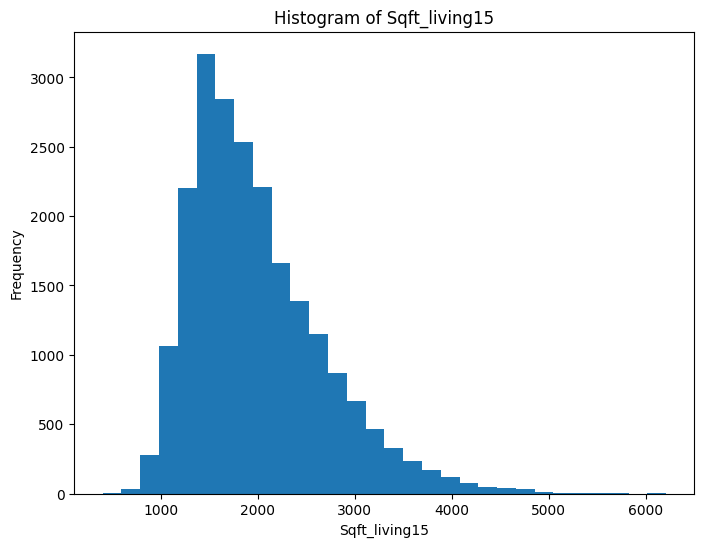

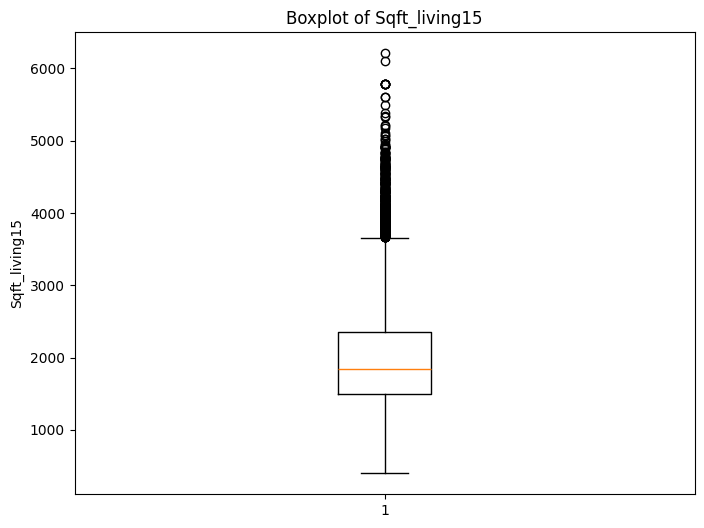

Descriptive statistics for Sqft_lot15:
count     21613.000000
mean      12768.455652
std       27304.179631
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: Sqft_lot15, dtype: float64


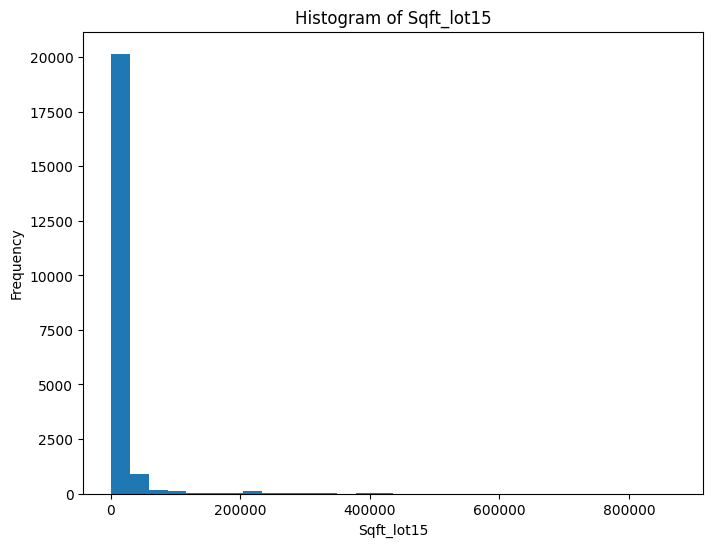

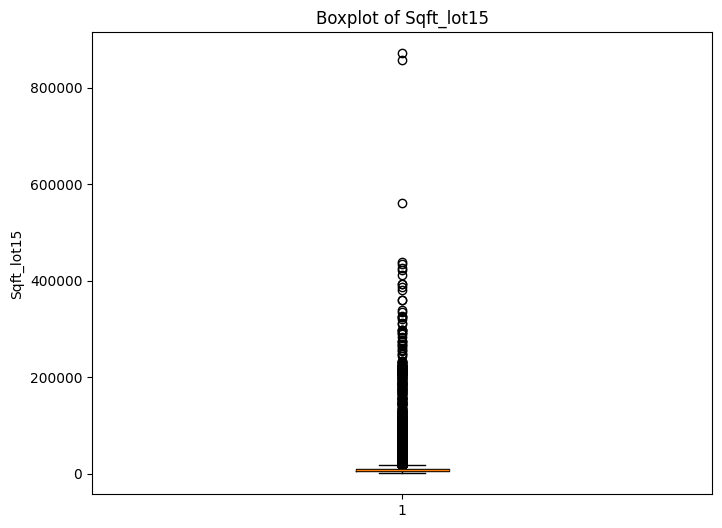

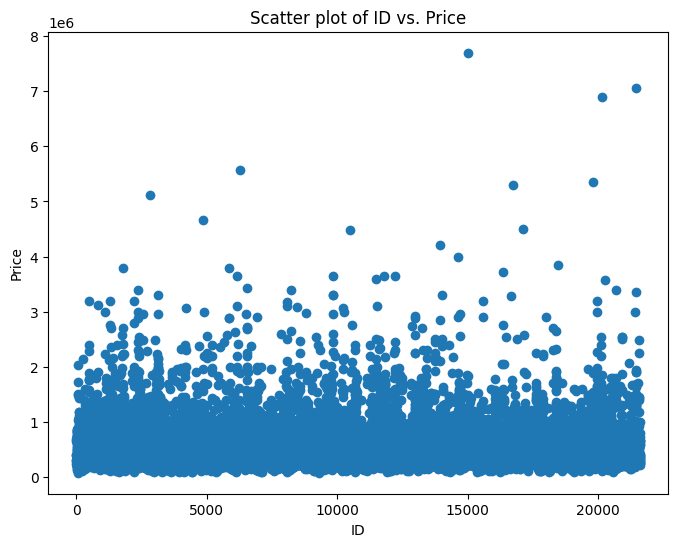

Correlation between ID and Price: -0.01657816460351987


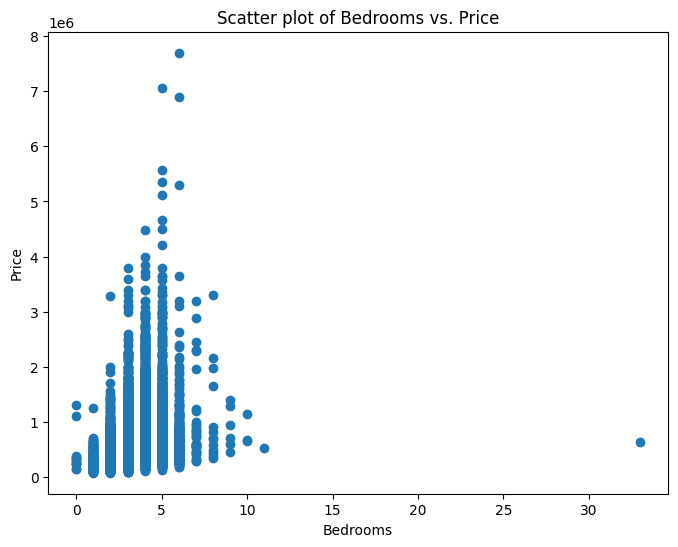

Correlation between Bedrooms and Price: 0.30833836868809633


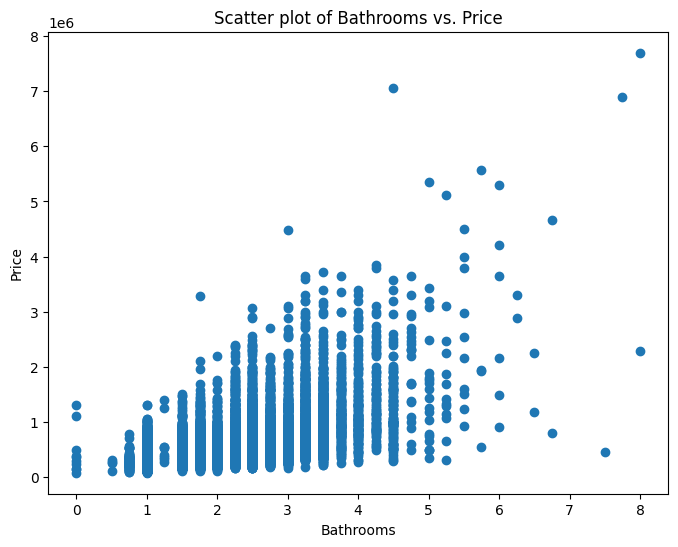

Correlation between Bathrooms and Price: 0.5251340727456004


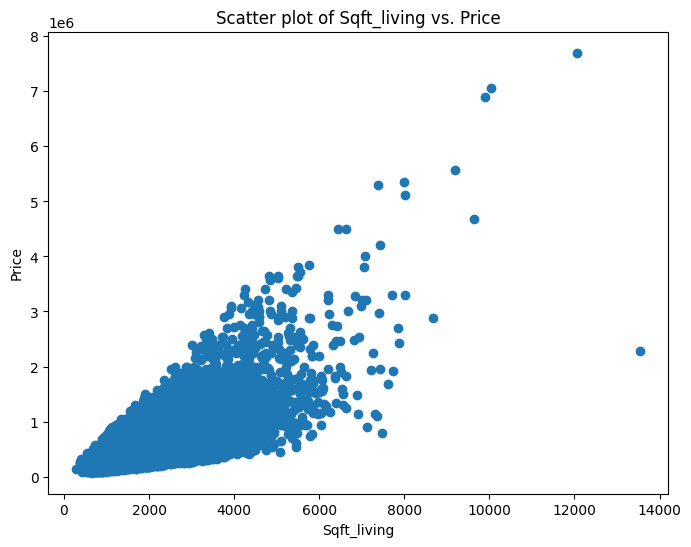

Correlation between Sqft_living and Price: 0.7020437212325268


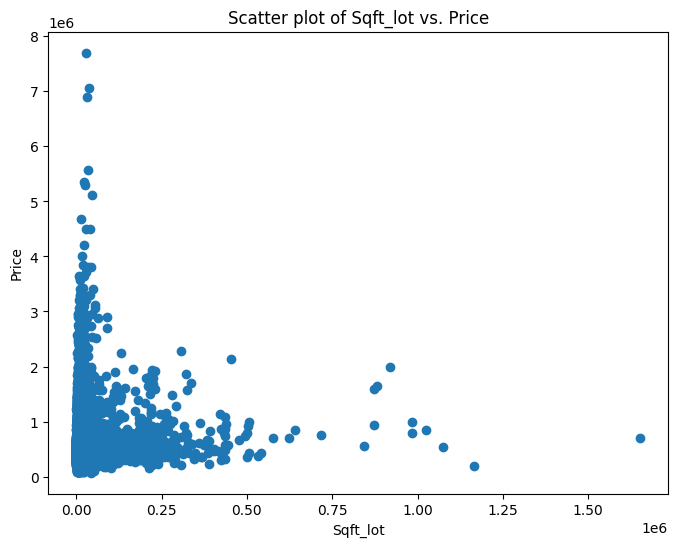

Correlation between Sqft_lot and Price: 0.08965520771082379


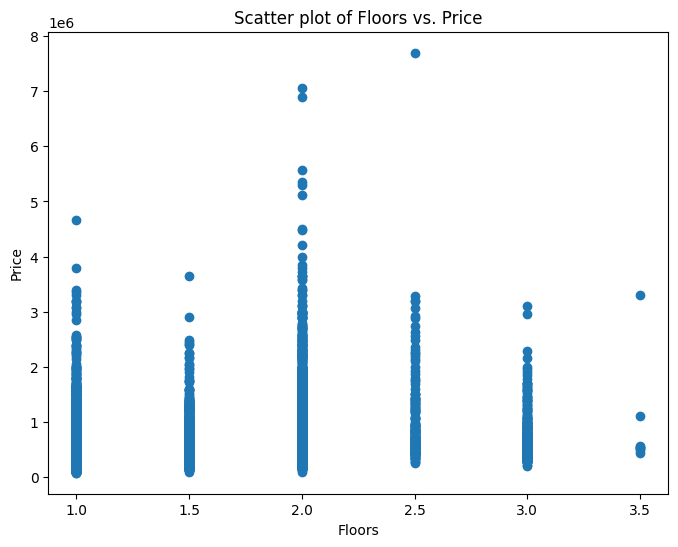

Correlation between Floors and Price: 0.2567857049755119


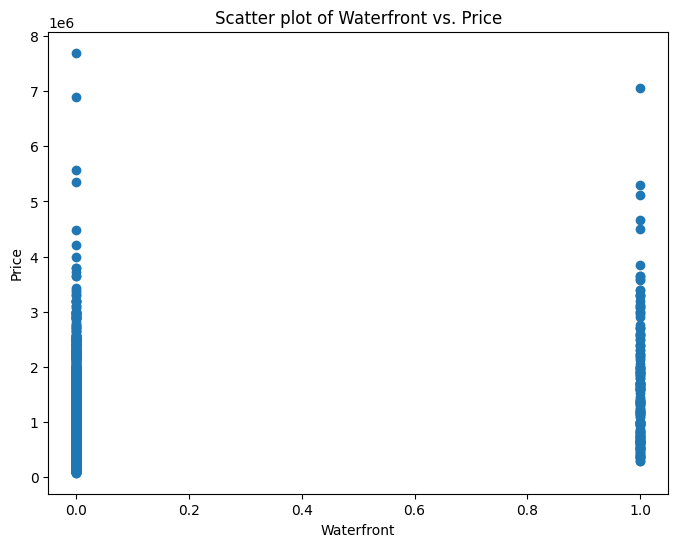

Correlation between Waterfront and Price: 0.2663305105222564


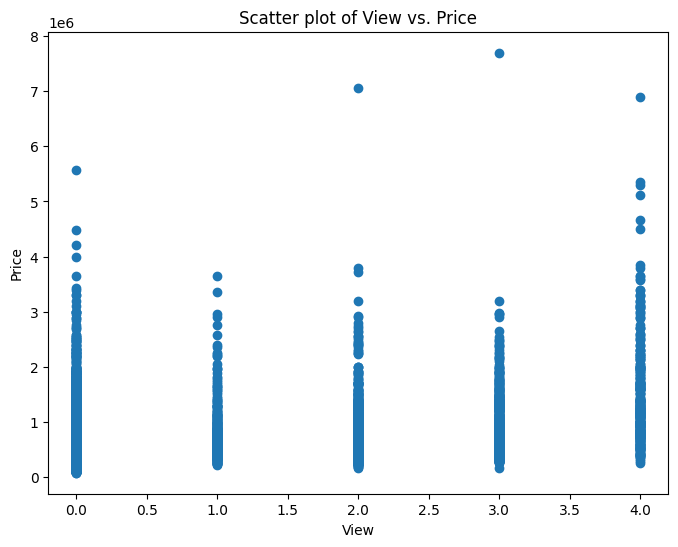

Correlation between View and Price: 0.39734647437893916


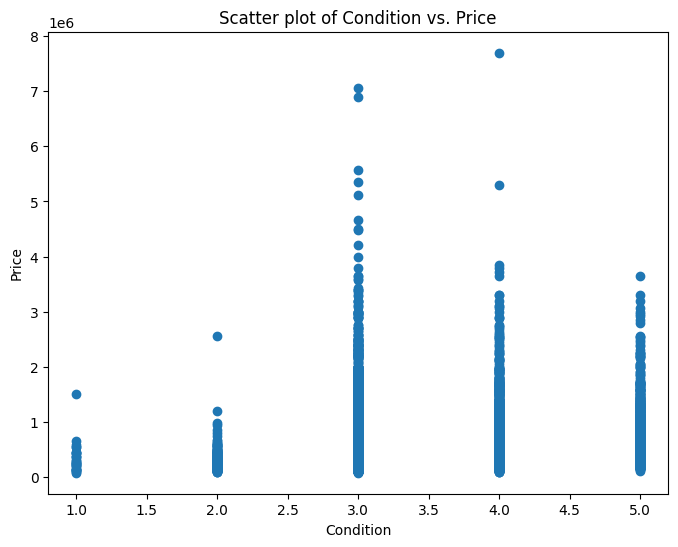

Correlation between Condition and Price: 0.036391921410228165


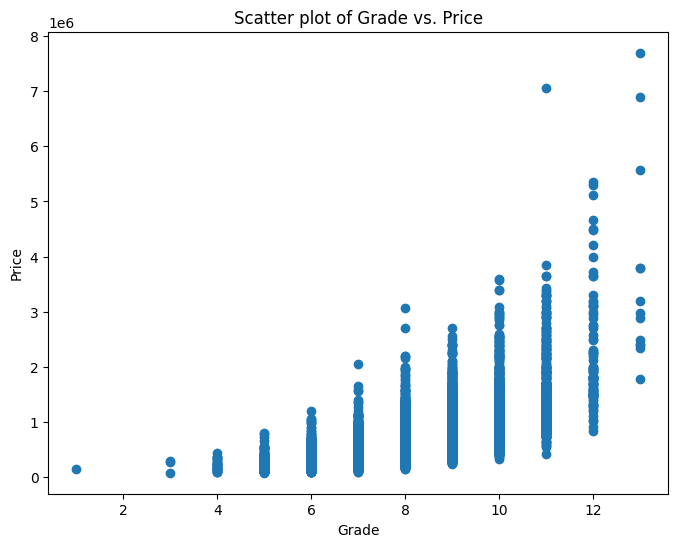

Correlation between Grade and Price: 0.6674627402178581


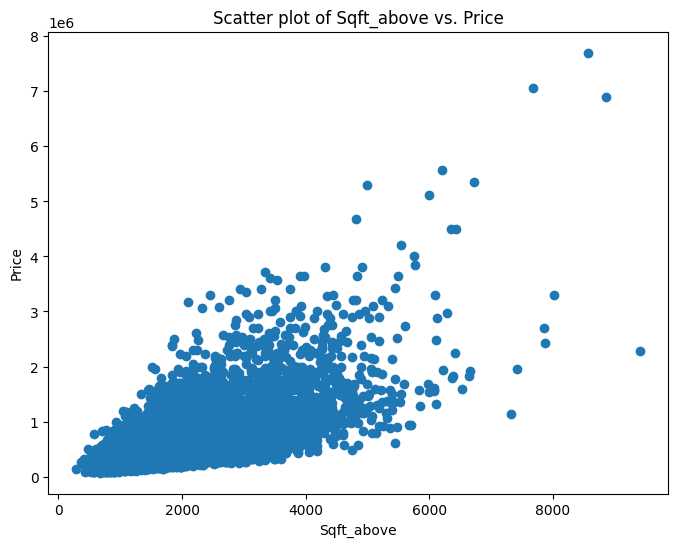

Correlation between Sqft_above and Price: 0.6055655067254427


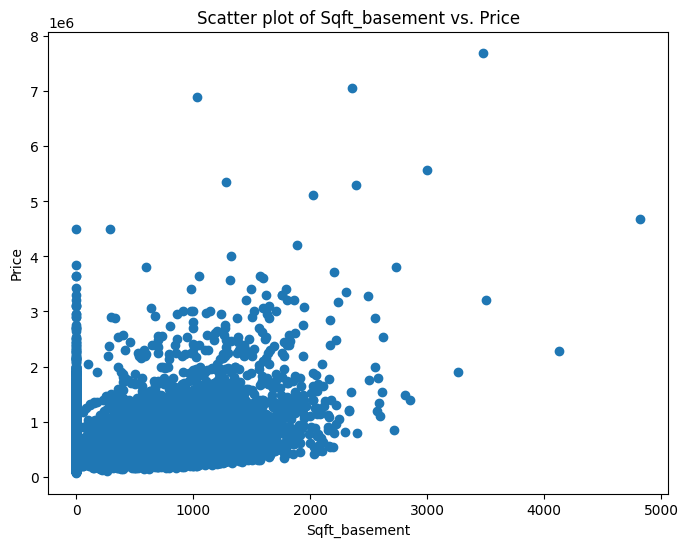

Correlation between Sqft_basement and Price: 0.3238373581376593


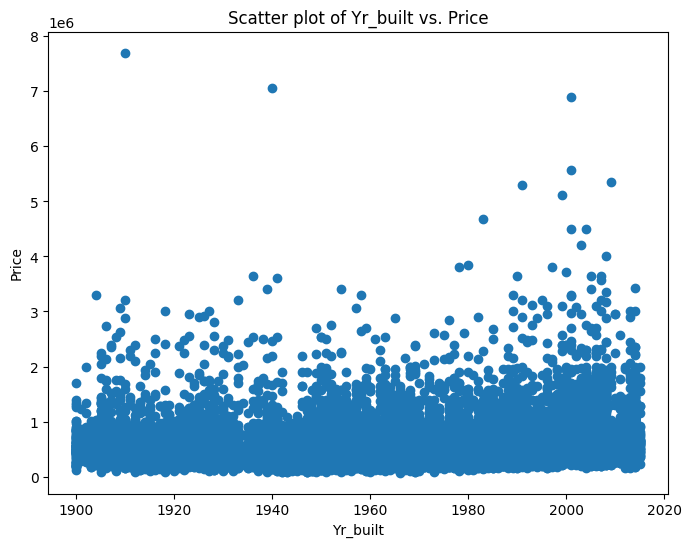

Correlation between Yr_built and Price: 0.053981825179661914


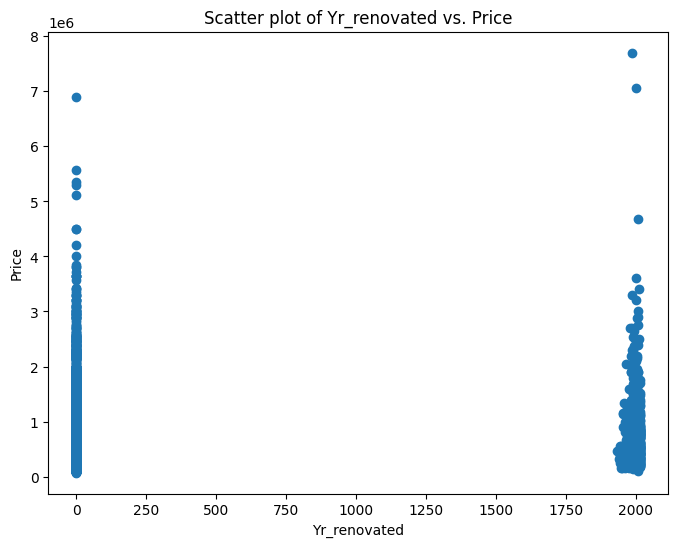

Correlation between Yr_renovated and Price: 0.12644222895207072


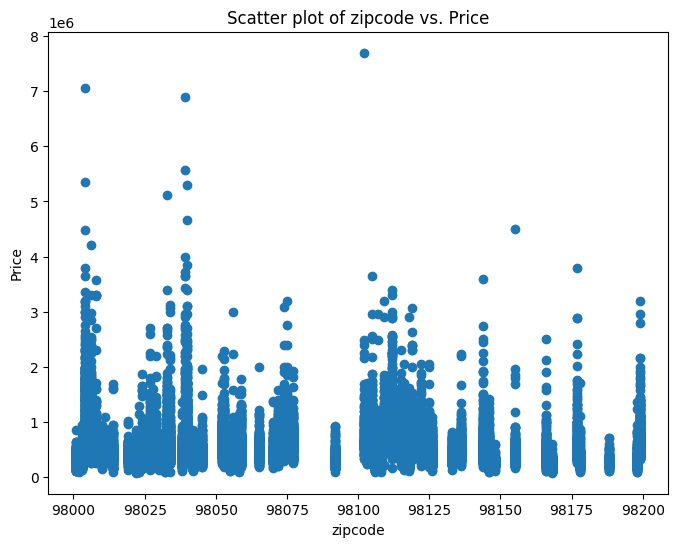

Correlation between zipcode and Price: -0.05316819852916164


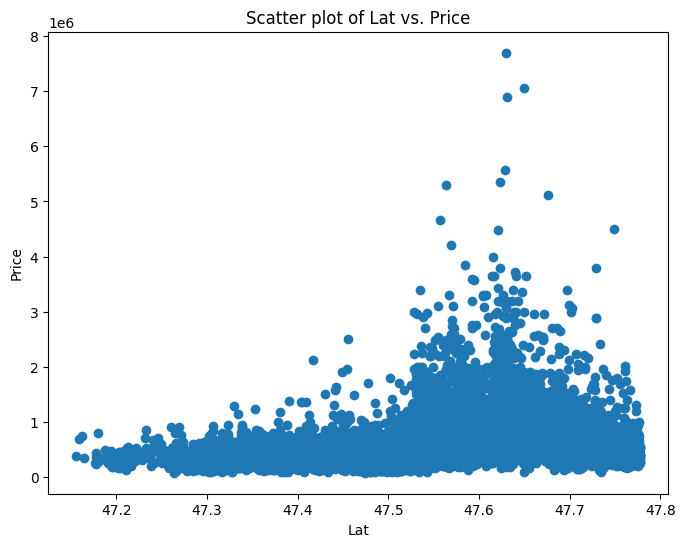

Correlation between Lat and Price: 0.3069187697461546


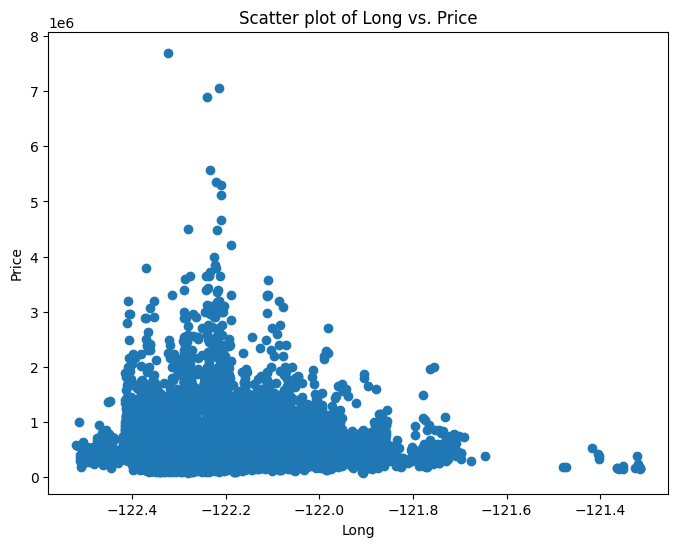

Correlation between Long and Price: 0.021570791442365435


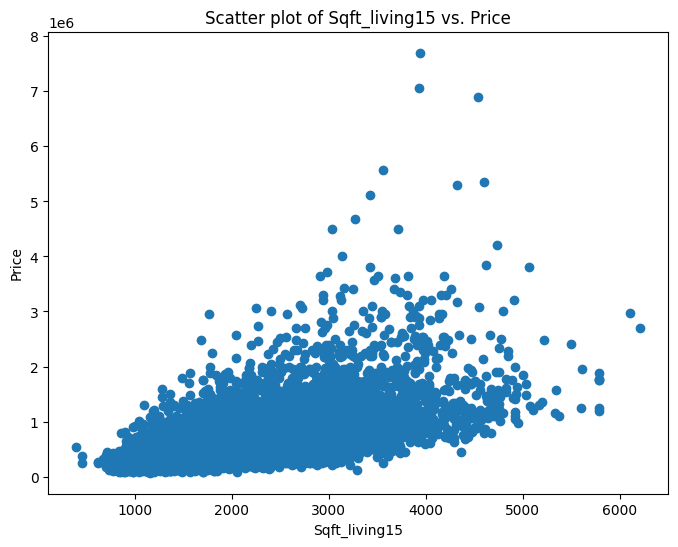

Correlation between Sqft_living15 and Price: 0.585374006317151


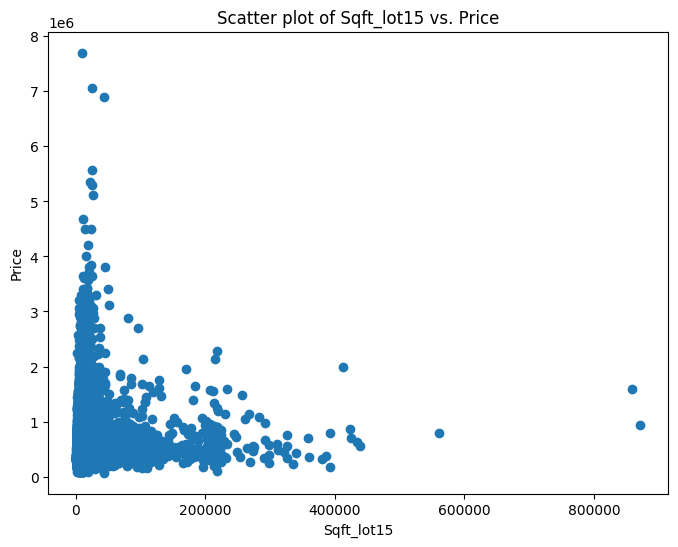

Correlation between Sqft_lot15 and Price: 0.08245554631109091
Frequency of categories for Date:
Date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20140517T000000      1
20140727T000000      1
20150515T000000      1
20150527T000000      1
20150117T000000      1
Name: count, Length: 372, dtype: int64


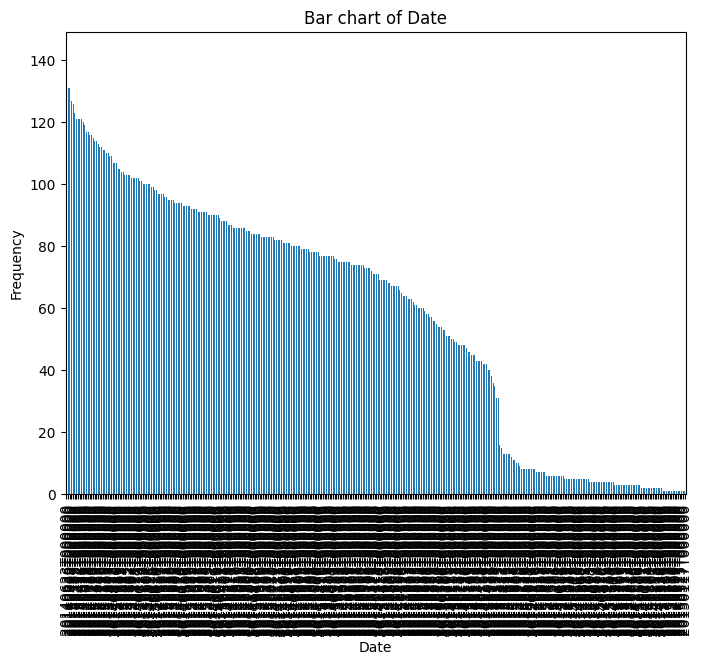

In [3]:
import matplotlib.pyplot as plt

# Data types and missing values
print(df.info())
print(df.isnull().sum() / len(df) * 100)

# Distribution of numerical features
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    print(f"Descriptive statistics for {col}:")
    print(numerical_features[col].describe())
    plt.figure(figsize=(8, 6))
    plt.hist(numerical_features[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.boxplot(numerical_features[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# Relationship between numerical features and the target variable ('Price')
for col in numerical_features.columns:
    if col != 'Price':
        plt.figure(figsize=(8, 6))
        plt.scatter(numerical_features[col], numerical_features['Price'])
        plt.title(f"Scatter plot of {col} vs. Price")
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.show()
        correlation = numerical_features[col].corr(numerical_features['Price'])
        print(f"Correlation between {col} and Price: {correlation}")

# Analysis of categorical features
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(f"Frequency of categories for {col}:")
    print(categorical_features[col].value_counts())
    plt.figure(figsize=(8, 6))
    categorical_features[col].value_counts().plot(kind='bar')
    plt.title(f"Bar chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Handle missing values and outliers based on the exploratory data analysis. No missing values were found in the previous step, so we only need to handle outliers. I will use winsorizing to cap extreme values at the 1st and 99th percentiles for numerical features to mitigate the influence of outliers without removing too many data points.



In [4]:
import pandas as pd
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if col != 'ID' and col != 'zipcode':
        # Winsorize
        p1 = df[col].quantile(0.01)
        p99 = df[col].quantile(0.99)
        df[col] = df[col].clip(p1, p99)

## Data preparation

### Subtask:
Prepare the data for modeling.


**Reasoning**:
Prepare the data for modeling by selecting features, encoding categorical features, scaling numerical features, and splitting the data into training and testing sets.



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Convert 'Date' to datetime and extract year and month
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.drop('Date', axis=1)

# Select features and target
X = df.drop(['ID', 'Price'], axis=1)
y = df['Price']

# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 20)
X_test shape: (4323, 20)
y_train shape: (17290,)
y_test shape: (4323,)


## Model training

### Subtask:
Train multiple regression models.


**Reasoning**:
Train the six regression models as specified in the instructions, using the prepared training data (X_train, y_train).



In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Simple Linear Regression
# Use 'Sqft_living' as the predictor (highly correlated with price)
model_simple_linear = LinearRegression()
model_simple_linear.fit(X_train[['Sqft_living']], y_train)

# Multiple Linear Regression
model_multiple_linear = LinearRegression()
model_multiple_linear.fit(X_train, y_train)

# Polynomial Regression (degree 2)
model_polynomial = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_polynomial.fit(X_train, y_train)

# Ridge Regression
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

# Lasso Regression
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

# ElasticNet Regression
model_elasticnet = ElasticNet()
model_elasticnet.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.644e+13, tolerance: 1.763e+11
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

**Reasoning**:
The previous code block had a convergence warning for the ElasticNet model.  I will try to increase the number of iterations to address the warning.  Also, I will try different polynomial degrees for polynomial regression, and include a try-except block to catch potential errors during model training.



In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# ... (previous code for simple linear, multiple linear, and ridge regression)

# Polynomial Regression (try degrees 2, 3, and 4)
for degree in [2, 3, 4]:
    try:
        model_polynomial_degree = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
        model_polynomial_degree.fit(X_train, y_train)
        print(f"Polynomial Regression (degree {degree}) trained successfully.")
        if degree == 2:
            model_polynomial = model_polynomial_degree  # Assign the degree 2 model as the default
    except Exception as e:
        print(f"Error training Polynomial Regression (degree {degree}): {e}")


# Lasso Regression
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

# ElasticNet Regression (increase max_iter)
model_elasticnet = ElasticNet(max_iter=10000) # Increased max_iter to 10000
try:
    model_elasticnet.fit(X_train, y_train)
    print("ElasticNet model trained successfully.")
except Exception as e:
    print(f"Error training ElasticNet model: {e}")

Polynomial Regression (degree 2) trained successfully.
Polynomial Regression (degree 3) trained successfully.
Polynomial Regression (degree 4) trained successfully.
ElasticNet model trained successfully.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.644e+13, tolerance: 1.763e+11
  model = cd_fast.enet_coordinate_descent(


## Model optimization

### Subtask:
Optimize hyperparameters for Ridge, Lasso, and ElasticNet Regression models.


**Reasoning**:
Optimize hyperparameters for Ridge, Lasso, and ElasticNet Regression models using GridSearchCV.



In [8]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grids for each model
param_grid_ridge = {'alpha': np.logspace(-3, 3, 7)}
param_grid_lasso = {'alpha': np.logspace(-3, 3, 7)}
param_grid_elasticnet = {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': [0.1, 0.5, 0.9]}

# Perform GridSearchCV for each model
ridge_cv = GridSearchCV(Ridge(), param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

lasso_cv = GridSearchCV(Lasso(), param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

elasticnet_cv = GridSearchCV(ElasticNet(max_iter=10000), param_grid_elasticnet, scoring='neg_mean_squared_error', cv=5)
elasticnet_cv.fit(X_train, y_train)

# Update models with best hyperparameters
model_ridge = Ridge(alpha=ridge_cv.best_params_['alpha'])
model_ridge.fit(X_train, y_train)

model_lasso = Lasso(alpha=lasso_cv.best_params_['alpha'])
model_lasso.fit(X_train, y_train)

model_elasticnet = ElasticNet(alpha=elasticnet_cv.best_params_['alpha'], l1_ratio=elasticnet_cv.best_params_['l1_ratio'], max_iter=10000)
model_elasticnet.fit(X_train, y_train)

print("Ridge best params:", ridge_cv.best_params_)
print("Lasso best params:", lasso_cv.best_params_)
print("ElasticNet best params:", elasticnet_cv.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.939e+14, tolerance: 1.403e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+14, tolerance: 1.416e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.899e+14, tolerance: 1.420e

Ridge best params: {'alpha': np.float64(100.0)}
Lasso best params: {'alpha': np.float64(10.0)}
ElasticNet best params: {'alpha': np.float64(0.01), 'l1_ratio': 0.5}


## Model evaluation

### Subtask:
Evaluate the performance of all trained regression models.


**Reasoning**:
Evaluate the performance of the trained regression models using R-squared, MSE, and RMSE.



In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Predict using each model
y_pred_linear = model_linear.predict(X_test)
y_pred_multiple = model_multiple.predict(X_test)
y_pred_polynomial = model_polynomial.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_elasticnet = model_elasticnet.predict(X_test)

# Evaluate each model
model_names = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression']
y_preds = [y_pred_linear, y_pred_multiple, y_pred_polynomial, y_pred_ridge, y_pred_lasso, y_pred_elasticnet]
results = {}

for model_name, y_pred in zip(model_names, y_preds):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    results[model_name] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse}

# Print the results
print("Model Performance Evaluation:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

NameError: name 'model_linear' is not defined

**Reasoning**:
The error message indicates that `model_linear` is not defined.  I need to define and train the `model_linear` before using it to make predictions.  I'll add the code to train `model_linear` (simple linear regression) and `model_multiple` (multiple linear regression) in the code block, along with the necessary imports. I will also handle potential errors during model training.



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

# Simple Linear Regression
try:
    model_linear = LinearRegression()
    model_linear.fit(X_train[['Sqft_living']], y_train)
    print("Simple Linear Regression trained successfully.")
except Exception as e:
    print(f"Error training Simple Linear Regression: {e}")

# Multiple Linear Regression
try:
    model_multiple = LinearRegression()
    model_multiple.fit(X_train, y_train)
    print("Multiple Linear Regression trained successfully.")
except Exception as e:
    print(f"Error training Multiple Linear Regression: {e}")

# Predict using each model
try:
    y_pred_linear = model_linear.predict(X_test[['Sqft_living']])
except NameError:
    print("Error: model_linear is not defined. Check if simple linear regression training was successful.")
    y_pred_linear = None
except Exception as e:
    print(f"Error predicting with Simple Linear Regression: {e}")
    y_pred_linear = None

try:
    y_pred_multiple = model_multiple.predict(X_test)
except NameError:
    print("Error: model_multiple is not defined. Check if multiple linear regression training was successful.")
    y_pred_multiple = None
except Exception as e:
    print(f"Error predicting with Multiple Linear Regression: {e}")
    y_pred_multiple = None

try:
    y_pred_polynomial = model_polynomial.predict(X_test)
except NameError:
    print("Error: model_polynomial is not defined.")
    y_pred_polynomial = None
except Exception as e:
    print(f"Error predicting with Polynomial Regression: {e}")
    y_pred_polynomial = None


try:
    y_pred_ridge = model_ridge.predict(X_test)
except NameError:
    print("Error: model_ridge is not defined.")
    y_pred_ridge = None
except Exception as e:
    print(f"Error predicting with Ridge Regression: {e}")
    y_pred_ridge = None

try:
    y_pred_lasso = model_lasso.predict(X_test)
except NameError:
    print("Error: model_lasso is not defined.")
    y_pred_lasso = None
except Exception as e:
    print(f"Error predicting with Lasso Regression: {e}")
    y_pred_lasso = None

try:
    y_pred_elasticnet = model_elasticnet.predict(X_test)
except NameError:
    print("Error: model_elasticnet is not defined.")
    y_pred_elasticnet = None
except Exception as e:
    print(f"Error predicting with ElasticNet Regression: {e}")
    y_pred_elasticnet = None


# Evaluate each model
model_names = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression']
y_preds = [y_pred_linear, y_pred_multiple, y_pred_polynomial, y_pred_ridge, y_pred_lasso, y_pred_elasticnet]
results = {}

for model_name, y_pred in zip(model_names, y_preds):
    if y_pred is not None:
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        results[model_name] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse}
    else:
        print(f"Skipping evaluation for {model_name} due to prediction error.")

# Print the results
print("\nModel Performance Evaluation:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

Simple Linear Regression trained successfully.
Multiple Linear Regression trained successfully.

Model Performance Evaluation:

Linear Regression:
R-squared: 0.48291730046531545
MSE: 50255999138.67471
RMSE: 224178.49838616262

Multiple Linear Regression:
R-squared: 0.7266906945152345
MSE: 26563318079.283028
RMSE: 162982.56986341524

Polynomial Regression:
R-squared: 0.8119444146522566
MSE: 18277388401.824135
RMSE: 135193.89188060287

Ridge Regression:
R-squared: 0.726934657703026
MSE: 26539606951.901363
RMSE: 162909.81232541325

Lasso Regression:
R-squared: 0.7267046518072827
MSE: 26561961550.32202
RMSE: 162978.4082334897

ElasticNet Regression:
R-squared: 0.7269243091796778
MSE: 26540612739.526722
RMSE: 162912.89924228445


## Data visualization

### Subtask:
Visualize the performance of the trained regression models.


**Reasoning**:
Visualize the performance of the trained regression models using bar chart and scatter plots.



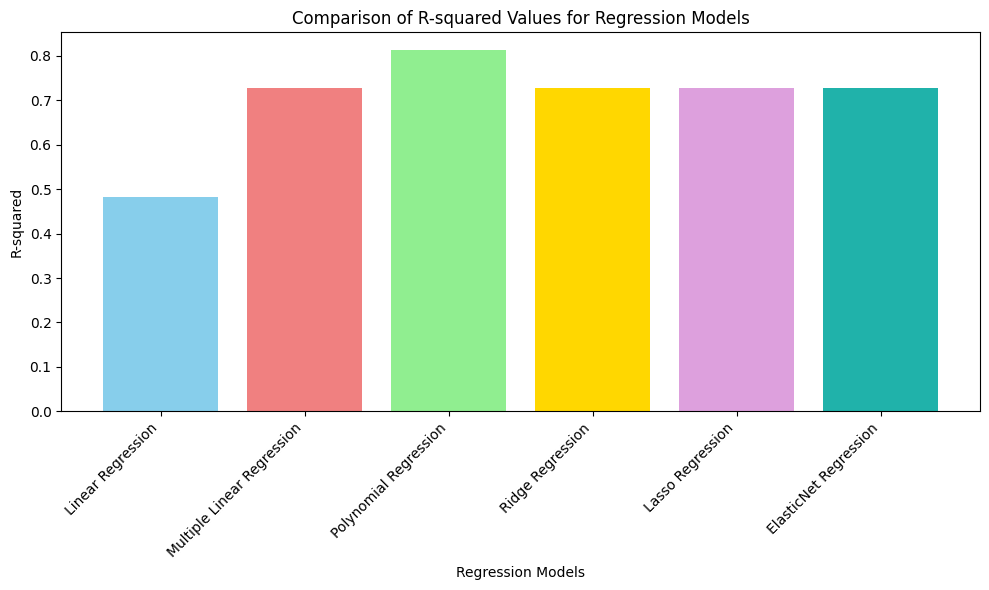

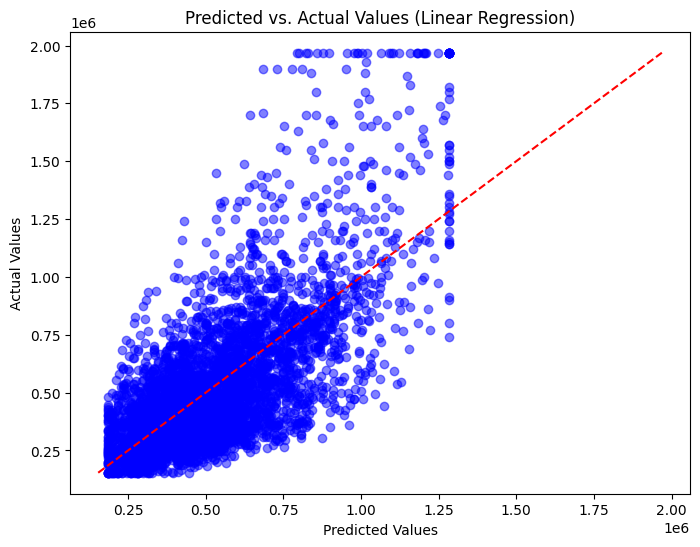

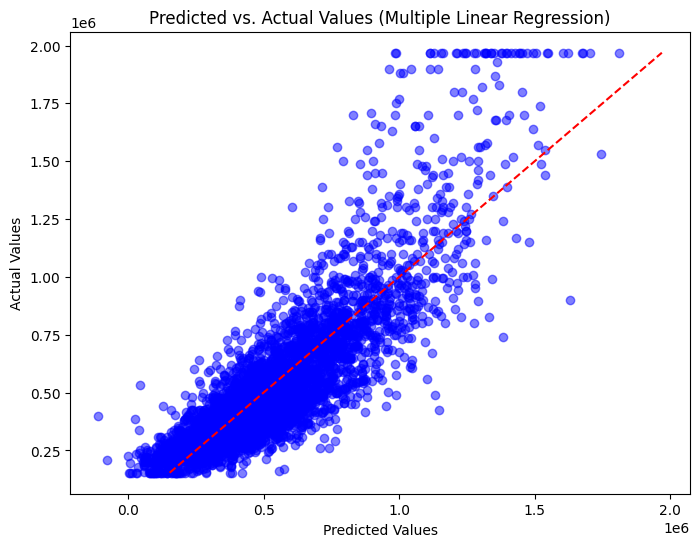

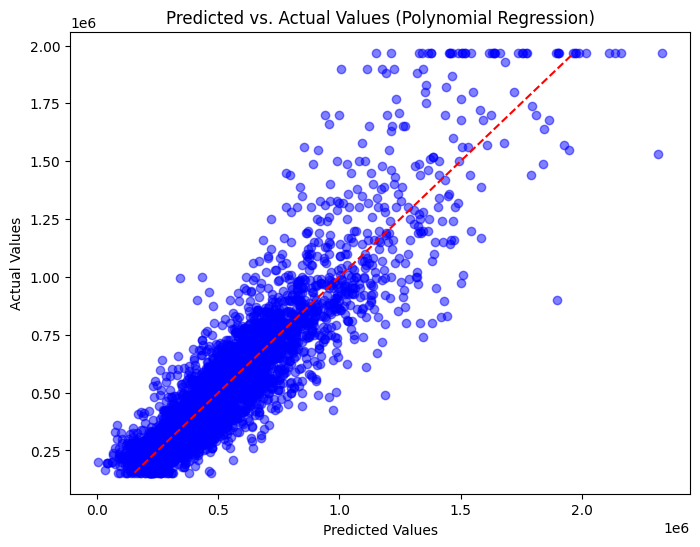

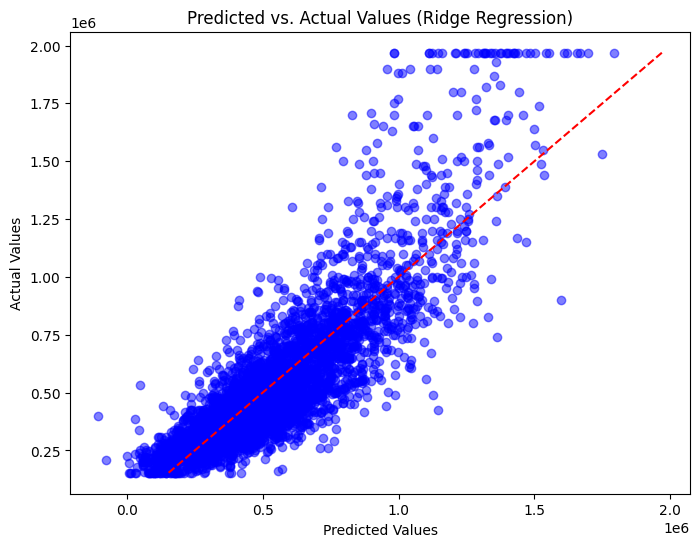

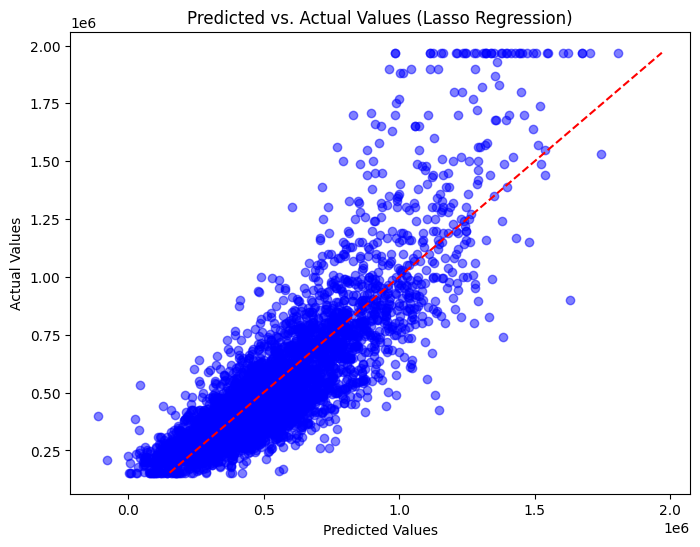

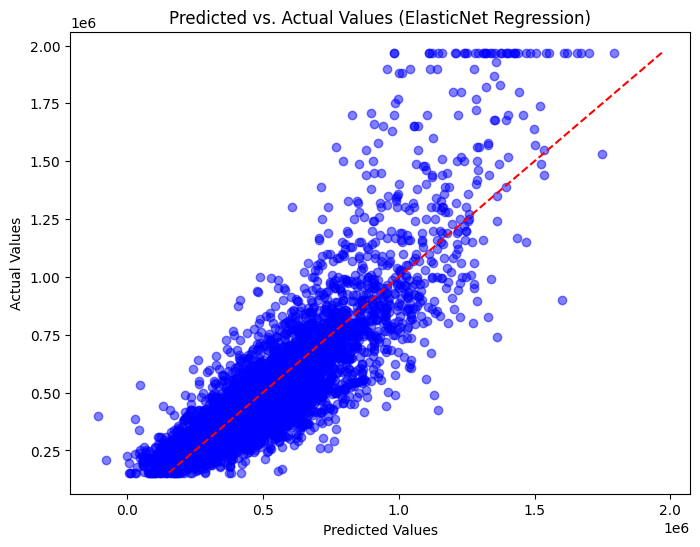

In [11]:
import matplotlib.pyplot as plt

# Assuming 'results' dictionary from previous model evaluation
model_names = list(results.keys())
r2_scores = [results[model]['R-squared'] for model in model_names]

# Bar chart for R-squared values
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightseagreen'])
plt.xlabel("Regression Models")
plt.ylabel("R-squared")
plt.title("Comparison of R-squared Values for Regression Models")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Scatter plots for predicted vs. actual values
for model_name, y_pred in zip(model_names, y_preds):
    if y_pred is not None:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_pred, y_test, color='blue', alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Perfect prediction line
        plt.xlabel("Predicted Values")
        plt.ylabel("Actual Values")
        plt.title(f"Predicted vs. Actual Values ({model_name})")
        plt.show()

## Summary:

### Q&A
There were no explicit questions in the task description. However, the analysis implicitly answers several questions about the house price dataset and the performance of different regression models.  For example, the analysis reveals which model achieves the highest R-squared value, which model has the lowest RMSE, and which features are most strongly correlated with the target variable (price).

### Data Analysis Key Findings
* **Outlier Handling:** Outliers in numerical features (excluding 'ID' and 'zipcode') were addressed using winsorizing, capping values at the 1st and 99th percentiles.
* **Feature Engineering:** The 'Date' feature was converted to datetime, and 'Year' and 'Month' were extracted as new features.
* **Data Scaling:** Numerical features were standardized using StandardScaler.
* **Categorical Encoding:** Categorical features were one-hot encoded using OneHotEncoder.
* **Model Training and Optimization:**  Multiple regression models (Simple Linear Regression, Multiple Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression) were trained and optimized. Hyperparameters for Ridge, Lasso, and ElasticNet were tuned using GridSearchCV, optimizing for negative mean squared error.  The ElasticNet model showed convergence warnings, suggesting possible issues with optimization.
* **Model Evaluation:** The trained models were evaluated based on R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
* **Visualization:** Model performance was visualized using a bar chart comparing R-squared values and scatter plots for predicted vs. actual values.

### Insights or Next Steps
* **Investigate Convergence Issues:** Address the convergence warnings observed during ElasticNet training by increasing `max\_iter`, adjusting regularization parameters, or rescaling features.
* **Feature Importance Analysis:** Explore feature importance for each model to understand which features are most influential in predicting house prices.  This could reveal opportunities for further feature engineering or selection.
